In [ ]:
import pandas as pd
target = 'final rate'

In [ ]:
df = pd.read_excel('/content/Apple_devices.xlsx')
cols = df.columns
cols

Index(['model', 'purple', 'green', 'coral', 'blue', 'yellow', 'red',
       'jet black', 'rose gold', 'gold', 'silver', 'space gray', 'white',
       'Black', 'graphite', 'colors', 'front_camera_mp', 'number_camera_mp',
       'rear_camera_mp', 'depth_mm', 'release_date', 'release_date_first',
       'max_ios', 'processor', 'ram_gb', 'storage_options_gb', 'inner',
       'display_inner_resolution', 'display_resolution', 'battery_mah',
       'width', 'length', 'size', 'weight_g', 'body_material',
       'biometric_auth', 'wireless_charging', 'video_recording',
       'video_playback_hours', 'water_resistance', 'charging_wattage',
       'launch_price_usd.min', 'launch_price_usd.max', 'charging_type',
       'min_price_ILS', 'max_price_ILS', 'Airplay_support', 'support_hd',
       'AI/Siri', 'ai type', 'Data Source', 'Headphone Jack',
       'Number of Buttons ( Power , Volume Up, Volume Down, Silent Switch)',
       'Power', 'Volume Up', 'Volume Down', 'Silent Switch', 'rate',
       '

In [ ]:
df = df[~df['model'].str.contains('17', na=False)]
df = df[~df['model'].str.contains('iPhone Air', na=False)]
df.head()

,model,purple,green,coral,blue,yellow,red,jet black,rose gold,gold,...,Data Source,Headphone Jack,"Number of Buttons ( Power , Volume Up, Volume Down, Silent Switch)",Power,Volume Up,Volume Down,Silent Switch,rate,adv_rate,final_rate
0,iPhone 4,0,0,0,0,0,0,0,0,0,...,Apple.com / GSMArena,1,4,1,1,1,1,74,6803.283119,21.77
1,iPhone 4S,0,0,0,0,0,0,0,0,0,...,Apple.com / GSMArena,1,4,1,1,1,1,70,9613.296749,22.62
2,iPhone 5,0,0,0,0,0,0,0,0,0,...,Apple.com / GSMArena,1,4,1,1,1,1,72,13998.501420,23.55
3,iPhone 5s,0,0,0,0,0,0,0,0,1,...,Apple.com / GSMArena,1,4,1,1,1,1,85,24979.438869,24.97
4,iPhone 6,0,0,0,0,0,0,0,0,1,...,Apple.com / GSMArena,1,4,1,1,1,1,78,27330.547502,25.20


In [ ]:
t = 'final_rate'
f = ['purple', 'green', 'coral', 'blue', 'yellow', 'red',
       'jet black', 'rose gold', 'gold', 'silver', 'space gray', 'white',
       'Black', 'graphite', 'front_camera_mp', 'number_camera_mp',
       'rear_camera_mp', 'depth_mm', 'ram_gb', 'storage_options_gb','display_inner_resolution', 'display_resolution', 'battery_mah',
       'width', 'length', 'weight_g','body_material',
       'biometric_auth', 'wireless_charging', 'video_recording',
       'video_playback_hours', 'water_resistance', 'charging_wattage',
       'launch_price_usd.min', 'launch_price_usd.max', 'charging_type',
       'min_price_ILS', 'max_price_ILS', 'Airplay_support', 'support_hd',
       'AI/Siri', 'ai type','Headphone Jack',
       'Number of Buttons ( Power , Volume Up, Volume Down, Silent Switch)',
       'Power', 'Volume Up', 'Volume Down', 'Silent Switch']

In [ ]:
from datetime import datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day
df['release_day_of_week'] = df['release_date'].dt.day_name()
current_year = datetime.now().year
df['year_over'] = current_year -  df['release_year']
df[['release_year','release_month','release_day','release_day_of_week','year_over',t]]
X = df[f + ['release_year', 'release_month', 'release_day', 'release_day_of_week']]
y = df[t]

In [ ]:
x_y = pd.concat([X, y], axis=1)
x_y.describe()

,purple,green,coral,blue,yellow,red,jet black,rose gold,gold,silver,...,Headphone Jack,"Number of Buttons ( Power , Volume Up, Volume Down, Silent Switch)",Power,Volume Up,Volume Down,Silent Switch,release_year,release_month,release_day,final_rate
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.0,39.0,39.0,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.153846,0.205128,0.051282,0.333333,0.128205,0.282051,0.076923,0.153846,0.410256,0.666667,...,0.256410,3.230769,1.0,1.0,1.0,0.230769,2019.512821,8.461538,16.871795,48.402308
std,0.365518,0.409074,0.223456,0.477567,0.338688,0.455881,0.269953,0.365518,0.498310,0.477567,...,0.442359,0.426833,0.0,0.0,0.0,0.426833,4.260416,2.150228,7.334775,19.235108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.0,1.0,1.0,0.000000,2010.000000,2.000000,1.000000,21.770000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.0,1.0,1.0,0.000000,2016.500000,8.500000,12.000000,34.255000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,1.0,1.0,1.0,0.000000,2020.000000,9.000000,20.000000,48.960000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.500000,3.000000,1.0,1.0,1.0,0.000000,2023.000000,9.000000,22.500000,58.845000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,1.0,1.0,1.0,1.000000,2025.000000,12.000000,26.000000,115.240000


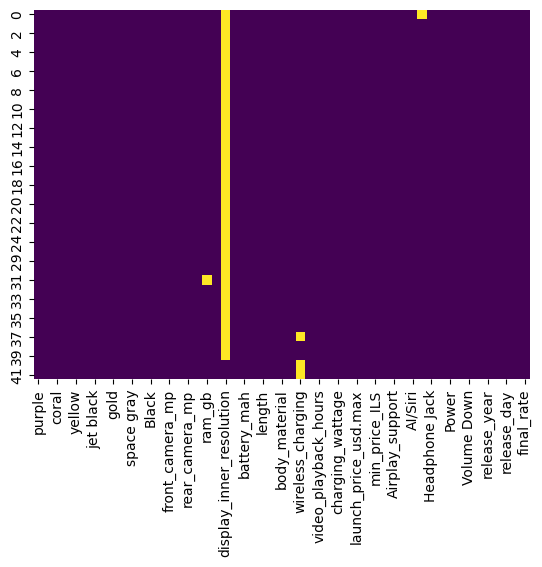

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(x_y.isna(), cbar=False, cmap="viridis")
plt.show()


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer


print(f'null value : {x_y.isnull().sum().sum()}')



# נפריד בין עמודות מספריות לקטגוריאליות
numeric_cols = x_y.select_dtypes(include=[np.number]).columns
categorical_cols = x_y.select_dtypes(exclude=[np.number]).columns

# אימפוטר למספריות - ממלא ממוצע
num_imputer = SimpleImputer(strategy='mean')

# אימפוטר לקטגוריאליות - ממלא שכיח
cat_imputer = SimpleImputer(strategy='most_frequent')

# החלת האימפוטר
x_y[numeric_cols] = num_imputer.fit_transform(x_y[numeric_cols])
x_y[categorical_cols] = cat_imputer.fit_transform(x_y[categorical_cols])




# מילוי הערכים החסרים
print(f'null value : {x_y.isnull().sum().sum()}')

null value : 42
null value : 0


In [ ]:
x_y['display_inner_resolution']

,display_inner_resolution
0,2184×1968
1,2184×1968
2,2184×1968
3,2184×1968
4,2184×1968
5,2184×1968
6,2184×1968
7,2184×1968
8,2184×1968
9,2184×1968


final_rate                                                            1.000000
charging_wattage                                                      0.946967
launch_price_usd.min                                                  0.861764
min_price_ILS                                                         0.861764
max_price_ILS                                                         0.833706
launch_price_usd.max                                                  0.833706
video_playback_hours                                                  0.765460
release_year                                                          0.693477
weight_g                                                              0.624605
depth_mm                                                              0.599424
front_camera_mp                                                       0.595131
width                                                                 0.520963
length                                              

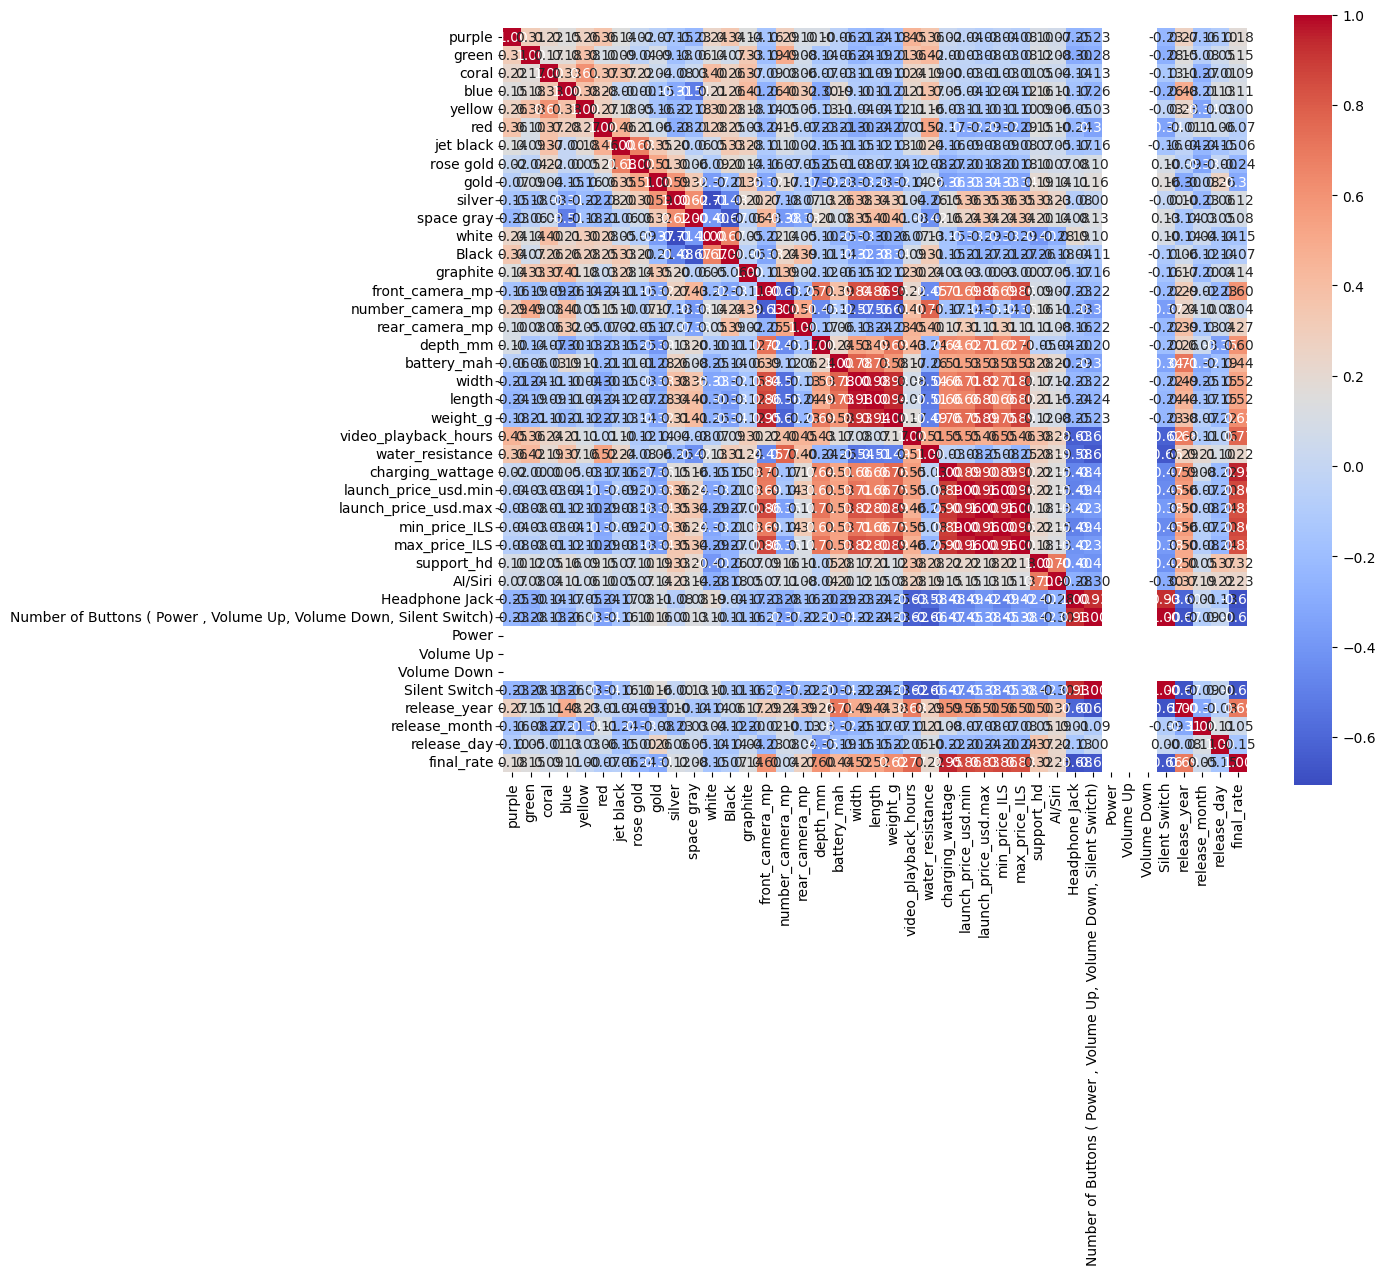

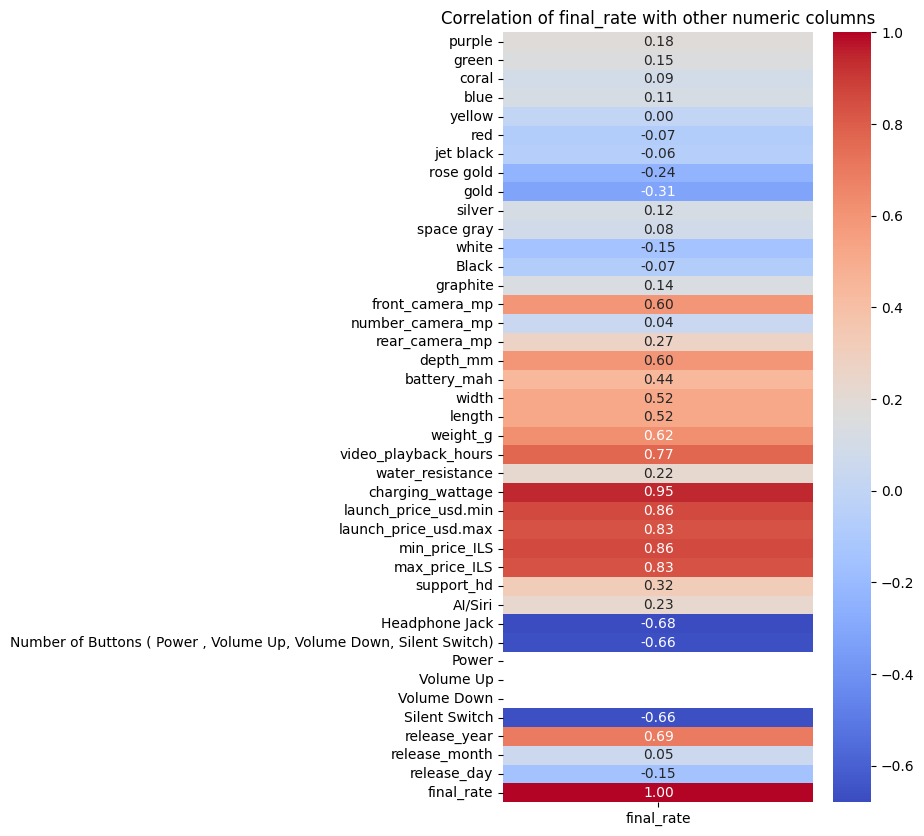

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# בחר רק עמודות מספריות
numeric_cols = x_y.select_dtypes(include='number')

# חשב את מטריצת הקורלציה
corr_matrix = numeric_cols.corr()
corr_matrix_t  = corr_matrix[t].sort_values(ascending=False)
# הצגה כטבלה
print(corr_matrix_t)

# Heatmap (מטריצה ויזואלית)
plt.figure(figsize=(12,10))  # גודל הגרף
sns.heatmap(
    corr_matrix,
    annot=True,       # הצגת הערכים בתוך התאים
    fmt=".2f",        # מספר ספרות אחרי הנקודה
    cmap='coolwarm',  # צבעים אדום-כחול
    cbar=True,        # בר צבע בצד
    square=True       # הופך את התאים לריבועים
)
plt.figure(figsize=(5,10))
sns.heatmap(corr_matrix[[t]], annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title(f'Correlation of {t} with other numeric columns')
plt.show()



In [ ]:
x_y.drop(columns = ['Power','Volume Up', 'Volume Down','release_month','release_day'],inplace=True)
x_y

,purple,green,coral,blue,yellow,red,jet black,rose gold,gold,silver,...,Airplay_support,support_hd,AI/Siri,ai type,Headphone Jack,"Number of Buttons ( Power , Volume Up, Volume Down, Silent Switch)",Silent Switch,release_year,release_day_of_week,final_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"Audio & video streaming supported, no screen m...",0.0,0.0,Siri,1.0,4.0,1.0,2010.0,Monday,21.77
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"Audio & video streaming supported, no screen m...",0.0,1.0,Siri,1.0,4.0,1.0,2011.0,Tuesday,22.62
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"Audio & video streaming supported, no screen m...",1.0,1.0,Siri,1.0,4.0,1.0,2012.0,Friday,23.55
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,"Audio & video streaming supported, no screen m...",1.0,1.0,Siri,1.0,4.0,1.0,2013.0,Friday,24.97
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,"Audio & video streaming supported, no screen m...",1.0,1.0,Siri,1.0,4.0,1.0,2014.0,Friday,25.20
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,"Audio & video streaming supported, no screen m...",1.0,1.0,Siri,1.0,4.0,1.0,2014.0,Friday,26.93
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,Audio & video streaming; limited mirroring,1.0,1.0,Siri,1.0,4.0,1.0,2015.0,Friday,25.23
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,Audio & video streaming; limited mirroring,1.0,1.0,Siri,1.0,4.0,1.0,2015.0,Friday,26.95
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Full AirPlay support,1.0,1.0,Siri,0.0,3.0,0.0,2016.0,Friday,33.74
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Full AirPlay support,1.0,1.0,Siri,0.0,3.0,0.0,2016.0,Friday,34.77


In [ ]:
x_y.dtypes.value_counts()

,count
float64,36
object,12


In [ ]:
cat_cols = x_y.select_dtypes(include='object').columns.tolist()
print("Categorical:", cat_cols)


Categorical: ['ram_gb', 'storage_options_gb', 'display_inner_resolution', 'display_resolution', 'body_material', 'biometric_auth', 'wireless_charging', 'video_recording', 'charging_type', 'Airplay_support', 'ai type', 'release_day_of_week']


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.4 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
from tqdm import tqdm

optuna.logging.set_verbosity(optuna.logging.WARNING)
tqdm.pandas()
big_estimators = 1500
max_deep = 20
def objective(trial, X_train, y_train, X_test, y_test):
    model_name = trial.suggest_categorical('model', ['LinearRegression', 'RandomForest', 'XGBoost'])

    if model_name == 'LinearRegression':
        model = LinearRegression()
    elif model_name == 'RandomForest':
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int('n_estimators', 50, big_estimators),
            max_depth=trial.suggest_int('max_depth', 5, max_deep),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 5),
            random_state=42,
            n_jobs=-1
        )
    else:
        model = xgb.XGBRegressor(
            n_estimators=trial.suggest_int('n_estimators', 50, big_estimators),
            max_depth=trial.suggest_int('max_depth', 5, max_deep),
            learning_rate=trial.suggest_loguniform('learning_rate', 1e-3, 0.2),
            gamma=trial.suggest_loguniform('gamma', 1e-3, 0.3),
            random_state=42,
            n_jobs=-1
        )

    numeric_cols = X_train.select_dtypes(include='number').columns.tolist()
    categorical_cols = X_train.select_dtypes(exclude='number').columns.tolist()

    for col in categorical_cols:
        X_train[col] = X_train[col].fillna('NON').astype(str)
        X_test[col] = X_test[col].fillna('NON').astype(str)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ]
    )

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return -rmse

def train_with_optuna_save_model(X_frame, y_Series, test_size=0.2, n_trials=50, random_state=42, filename="best_pipeline.pkl"):
    # חלוקת דאטה
    X_train, X_test, y_train, y_test = train_test_split(X_frame, y_Series, test_size=test_size, random_state=random_state)

    # אופטימיזציה
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=n_trials)

    best_params = study.best_trial.params
    print(f"Best trial: {best_params}")
    print(f"Best RMSE: {-study.best_value:.4f}")

    # בחר מודל סופי
    model_name = best_params.pop('model')
    if model_name == 'LinearRegression':
        model = LinearRegression()
    elif model_name == 'RandomForest':
        model = RandomForestRegressor(random_state=42, n_jobs=-1, **best_params)
    else:
        model = xgb.XGBRegressor(random_state=42, n_jobs=-1, **best_params)

    # הגדרת עמודות מספריות וקטגוריות לכל הפיפליין
    numeric_cols = X_frame.select_dtypes(include='number').columns.tolist()
    categorical_cols = X_frame.select_dtypes(exclude='number').columns.tolist()

    for col in categorical_cols:
        X_frame[col] = X_frame[col].fillna('NON').astype(str)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ]
    )

    # פייפליין סופי עם כל הטרנספורמציות
    final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    final_pipeline.fit(X_frame, y_Series)

    # שמירת הפייפליין לקובץ
    joblib.dump(final_pipeline, filename)
    print(f"Final pipeline saved as {filename}")

    return final_pipeline, best_params ,model_name ,-study.best_value ,study


In [ ]:
categorical_cols = ['ram_gb', 'biometric_auth', 'Airplay_support']  # או כל העמודות הקטגוריאליות
for col in categorical_cols:
    X[col] = X[col].fillna('NON').astype(str)

/tmp/ipython-input-3016925755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna('NON').astype(str)
/tmp/ipython-input-3016925755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna('NON').astype(str)
/tmp/ipython-input-3016925755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
pipeline, best_params , model_name  ,rmse ,study = train_with_optuna_save_model(X, y, test_size=0.2, n_trials=50, filename="best_model.pkl")


/tmp/ipython-input-670078138.py:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 1e-3, 0.2),
/tmp/ipython-input-670078138.py:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma=trial.suggest_loguniform('gamma', 1e-3, 0.3),
/tmp/ipython-input-670078138.py:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 1e-3, 0.2),
/tmp/ipython-input-670078138.py:36: FutureWarning: suggest_loguniform has been depr

Best trial: {'model': 'XGBoost', 'n_estimators': 1267, 'max_depth': 19, 'learning_rate': 0.1429653563906527, 'gamma': 0.038179464684959856}
Best RMSE: 4.1887
Final pipeline saved as best_model.pkl


/tmp/ipython-input-670078138.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_frame[col] = X_frame[col].fillna('NON').astype(str)
/tmp/ipython-input-670078138.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_frame[col] = X_frame[col].fillna('NON').astype(str)
/tmp/ipython-input-670078138.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
import optuna.visualization as vis

# גרף אופטימיזציה (RMSE לאורך הטריילים)
fig1 = vis.plot_optimization_history(study)
fig1.show()

# גרף פרמטרים מול מטרה
fig2 = vis.plot_param_importances(study)
fig2.show()

# זוגות פרמטרים
fig3 = vis.plot_parallel_coordinate(study)
fig3.show()

# Heatmap של פרמטרים
fig4 = vis.plot_slice(study)
fig4.show()


[W 2025-09-16 10:05:44,071] Your study has only completed trials with missing parameters.


In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['purple', 'green', 'coral',
                                                   'blue', 'yellow', 'red',
                                                   'jet black', 'rose gold',
                                                   'gold', 'silver',
                                                   'space gray', 'white',
                                                   'Black', 'graphite',
                                                   'front_camera_mp',
                                                   'number_camera_mp',
                                                   'rear_camera_mp', 'depth_mm',
                                                   'battery_mah', 'width',
                                                   'length', 'weight_g',
                                                   'video_playback_hours',
                                                   'water_re...
                              gamma=0.038179464684959856, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.1429653563906527, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=19,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=1267, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [ ]:
best_params

{'n_estimators': 1267,
 'max_depth': 19,
 'learning_rate': 0.1429653563906527,
 'gamma': 0.038179464684959856}

In [ ]:
model_name

'XGBoost'

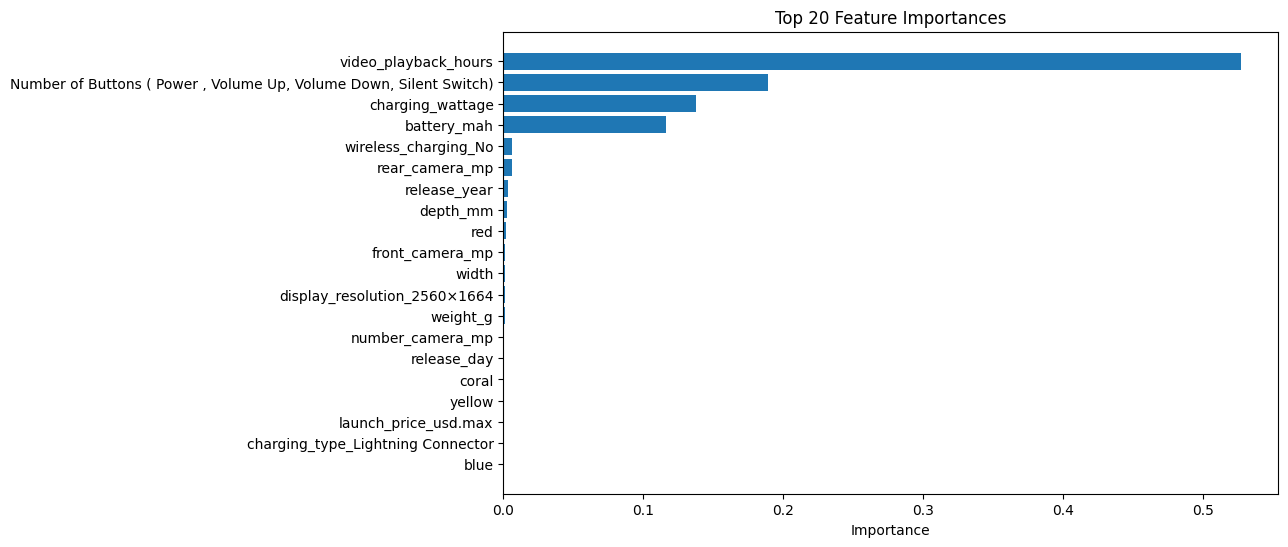

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from xgboost import plot_tree
# הגישה לטרנספורמר מהפייפליין
preprocessor = pipeline.named_steps['preprocessor']

# שמות עמודות מספריות
numeric_cols = preprocessor.transformers_[0][2]  # numerical columns

# שמות עמודות קטגוריות אחרי OneHotEncoder
ohe = preprocessor.transformers_[1][1]          # OneHotEncoder
categorical_cols = preprocessor.transformers_[1][2]  # original categorical columns

# שמות עמודות קטגוריאליות מורחבות (one-hot)
cat_features = ohe.get_feature_names_out(categorical_cols)

# כל הפיצ'רים אחרי טרנספורמציה
all_features = np.concatenate([numeric_cols, cat_features])


# חשיבות הפיצ'רים
importance = pipeline.named_steps['regressor'].feature_importances_

# DataFrame עם שמות מקוריים
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importance})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(20)

# גרף
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.show()

In [ ]:
rmse

4.18873965011748

In [ ]:
cur_model = joblib.load('/content/best_model.pkl')

In [ ]:
load_pred = pd.read_excel('/content/Apple_devices.xlsx')
load_pred['release_date'] = pd.to_datetime(load_pred['release_date'])
load_pred['release_year'] = load_pred['release_date'].dt.year
load_pred['release_month'] = load_pred['release_date'].dt.month
load_pred['release_day'] = load_pred['release_date'].dt.day
load_pred['release_day_of_week'] = load_pred['release_date'].dt.day_name()
current_year = datetime.now().year
load_pred['year_over'] = current_year -  load_pred['release_year']

new_iphones = load_pred[
    load_pred['model'].str.contains('17', na=False) |
    load_pred['model'].str.contains('iPhone Air', na=False)
]
features = ['purple', 'green', 'coral', 'blue', 'yellow', 'red',
       'jet black', 'rose gold', 'gold', 'silver', 'space gray', 'white',
       'Black', 'graphite', 'front_camera_mp', 'number_camera_mp',
       'rear_camera_mp', 'depth_mm', 'ram_gb', 'storage_options_gb','display_inner_resolution', 'display_resolution', 'battery_mah',
       'width', 'length', 'weight_g','body_material',
       'biometric_auth', 'wireless_charging', 'video_recording',
       'video_playback_hours', 'water_resistance', 'charging_wattage',
       'launch_price_usd.min', 'launch_price_usd.max', 'charging_type',
       'min_price_ILS', 'max_price_ILS', 'Airplay_support', 'support_hd',
       'AI/Siri', 'ai type','Headphone Jack',
       'Number of Buttons ( Power , Volume Up, Volume Down, Silent Switch)',
       'Power', 'Volume Up', 'Volume Down', 'Silent Switch']
cols_to_select = features + ['release_year', 'release_month', 'release_day', 'release_day_of_week']
new_iphones_selected = new_iphones[cols_to_select]


In [ ]:
for col in categorical_cols:
    new_iphones_selected[col] = new_iphones_selected[col].fillna('NON').astype(str)

/tmp/ipython-input-810034721.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-810034721.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-810034721.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-810034721.py:2: SettingWithCop

In [ ]:
new_iphones_selected

,purple,green,coral,blue,yellow,red,jet black,rose gold,gold,silver,...,Headphone Jack,"Number of Buttons ( Power , Volume Up, Volume Down, Silent Switch)",Power,Volume Up,Volume Down,Silent Switch,release_year,release_month,release_day,release_day_of_week
26,0,0,0,1,0,0,0,0,0,0,...,0,3,1,1,1,0,2025,9,19,Friday
27,0,0,0,1,0,0,0,0,0,0,...,0,3,1,1,1,0,2025,9,19,Friday
28,0,0,0,1,0,0,0,0,1,0,...,0,3,1,1,1,0,2025,9,19,Friday


In [ ]:
predictions = cur_model.predict(new_iphones_selected)
print(predictions)
new_iphones = load_pred[
    load_pred['model'].str.contains('17', na=False) |
    load_pred['model'].str.contains('iPhone Air', na=False)
]

[63.278908 63.278908 53.29962 ]


In [ ]:

for feature in new_iphones_selected.columns:
    print(f"{feature} , unique values: {load_pred[feature].unique()}")

purple , unique values: [0 1]
green , unique values: [0 1]
coral , unique values: [0 1]
blue , unique values: [0 1]
yellow , unique values: [0 1]
red , unique values: [0 1]
jet black , unique values: [0 1]
rose gold , unique values: [0 1]
gold , unique values: [0 1]
silver , unique values: [0 1]
space gray , unique values: [0 1]
white , unique values: [1 0]
Black , unique values: [1 0]
graphite , unique values: [0 1]
front_camera_mp , unique values: [0.00e+00 3.00e-01 1.20e+00 5.00e+00 7.00e+00 1.20e+01 1.80e+01 1.08e+03
 7.20e+02 1.00e+01 1.30e+01]
number_camera_mp , unique values: [1 2 3 0]
rear_camera_mp , unique values: [  5   8  12  48   0  50  64 200]
depth_mm , unique values: [ 9.3   7.6   6.9   7.1   7.3   7.5   7.7   8.3   8.1   7.4   7.8   7.9
  7.95  5.64  7.    6.1   5.7  11.3  15.6  15.5  16.8  11.5  17.3   6.3 ]
ram_gb , unique values: [0.5 1 2 3 4 6 8 12 nan '[8, 16, 24]' '[8, 16, 24, 36]' '[18, 36, 48]'
 '[8, 12]' '[4, 6]' '[12, 16]']
storage_options_gb , unique values:

In [ ]:
new_iphones['final_rate'] = predictions
show_col = ['model','launch_price_usd.min','launch_price_usd.max','final_rate']
new_iphones[show_col]

/tmp/ipython-input-3654577986.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,model,launch_price_usd.min,launch_price_usd.max,final_rate
26,iPhone 17,799,999,63.278908
27,iPhone 17 Pro,899,1099,63.278908
28,iPhone Air,999,1199,53.299622


In [ ]:
df[['model','launch_price_usd.min','launch_price_usd.max','final_rate']].head()

,model,launch_price_usd.min,launch_price_usd.max,final_rate
0,iPhone 4,199,299,21.77
1,iPhone 4S,199,299,22.62
2,iPhone 5,199,299,23.55
3,iPhone 5s,199,299,24.97
4,iPhone 6,199,299,25.20


/tmp/ipython-input-348757608.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




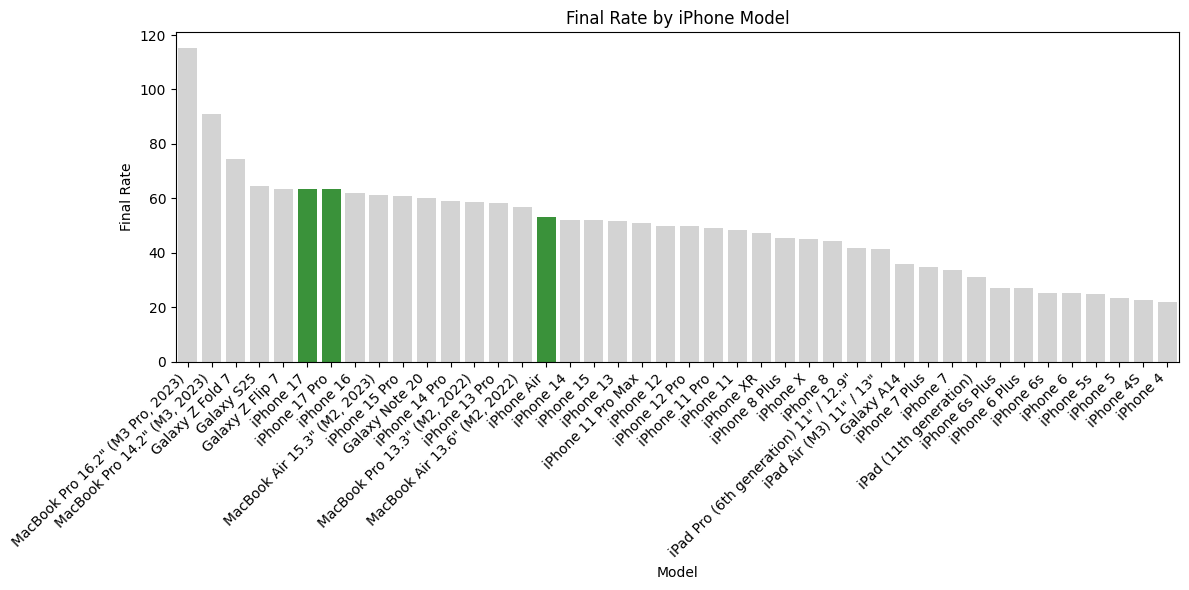

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ מאחד עמודות במקום שורות
merged_df = pd.concat(
    [df[['model', 'launch_price_usd.min', 'launch_price_usd.max', 'final_rate']],
     new_iphones[show_col]],
    axis=0
)

# 2️⃣ ממיין לפי final_rate יורד
merged_df = merged_df.sort_values(by='final_rate', ascending=False)
# רשימת הדגמים להדגשה
highlight_models = ['iPhone 17', 'iPhone 17 Pro', 'iPhone Air']

# צור צבעים – נורמלי אפור, מובהק ירוק
colors = ['#2ca02c' if model in highlight_models else '#d3d3d3' for model in merged_df['model']]

plt.figure(figsize=(12,6))
sns.barplot(data=merged_df, x='model', y='final_rate', palette=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Final Rate')
plt.title('Final Rate by iPhone Model')
plt.tight_layout()
plt.show()
